# Introduction to ImageTable

In [1]:
%matplotlib inline

In [2]:
# You need to specify the following variables according your own configuration.
import os 
host = os.environ['CASHOST']
port = os.environ['CASPORT']
userid = None
password = None

In [3]:
# needed to start a CAS server.
from swat import * 
sess = CAS(host, port,userid, password)

### Import ImageTable module

In [4]:
from dlpy.images import ImageTable

### Load images from a specified path

In [5]:
# imgpath should be a qualified directory that the current session has the access to.
# the folder structure is as follows:
# Giraffe_Dolphin
#     Giraffe
#         Giraffe images   
#     Dolphin
#         Dolphin images
# You need to specify this according to your own case.

imgpath='/dept/cas/leliuz/Data/Demo/Giraffe_Dolphin'
my_images = ImageTable.load_files(sess, path=imgpath)

### CAS table supported functions

#### Image Table is a subclass of CAS table, and support all the CAS table supported functions.

In [6]:
my_images = ImageTable.from_table(my_images)

In [7]:
my_images.head()

Selected Rows from Table IMAGEDATA_Y7G5BN

                                             _image_  _label_  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  Dolphin   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  Giraffe   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  Giraffe   
3  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  Dolphin   
4  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  Dolphin   

         _filename_0  
0  dolphin_10068.jpg  
1  giraffe_10433.jpg  
2  giraffe_10446.jpg  
3  dolphin_10708.jpg  
4  dolphin_10462.jpg

In [8]:
sess.tableinfo()

[TableInfo]

                Name  Rows  Columns  IndexedColumns Encoding  \
 0  IMAGEDATA_MAJRQO   409        3               0    utf-8   
 1  IMAGEDATA_Y7G5BN   409        3               0    utf-8   
 
   CreateTimeFormatted    ModTimeFormatted AccessTimeFormatted JavaCharSet  \
 0  27Mar2018:19:35:39  27Mar2018:19:35:39  27Mar2018:19:35:40        UTF8   
 1  27Mar2018:19:35:40  27Mar2018:19:35:40  27Mar2018:19:35:41        UTF8   
 
      CreateTime      ...       Global  Repeated  View  SourceName  \
 0  1.837799e+09      ...            0         0     0               
 1  1.837799e+09      ...            0         0     0               
 
    SourceCaslib Compressed Creator  Modifier SourceModTimeFormatted  \
 0                        0  leliuz                                    
 1                        0  leliuz                                    
 
   SourceModTime  
 0           NaN  
 1           NaN  
 
 [2 rows x 22 columns]

+ Elapsed: 0.0107s, user: 0.00665s, sys: 0.0162s, mem: 2.64mb

In [9]:
my_images.columninfo()

[ColumnInfo]

         Column  ID       Type  RawLength  FormattedLength  NFL  NFD
 0      _image_   1  varbinary    1075587          1075587    0    0
 1      _label_   2    varchar          7                7    0    0
 2  _filename_0   3    varchar         17               17    0    0

+ Elapsed: 0.00983s, user: 0.00767s, sys: 0.016s, mem: 2.92mb

## Basic ImageTable functions

### Display images

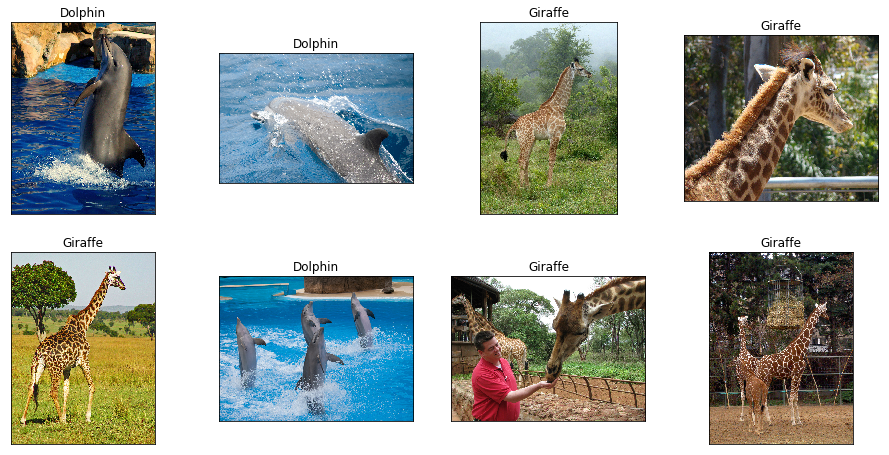

In [10]:
# randomly select 8 images from the table and arrange the display in 4 columns 
my_images.show(nimages=8,ncol=4, randomize=True)

### Summarize class labels information in the table

In [11]:
my_images.label_freq

Frequency for IMAGEDATA_Y7G5BN

         Level  Frequency
Dolphin      1        237
Giraffe      2        172

### Summarize the metadata of the images in the table

In [12]:
my_images.image_summary

jpg                   409
minWidth              170
maxWidth             1024
minHeight             127
maxHeight            1024
meanWidth         912.147
meanHeight        778.499
mean1stChannel    128.718
min1stChannel           0
max1stChannel         255
mean2ndChannel    124.123
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    94.2449
min3rdChannel           0
max3rdChannel         255
dtype: object

## Image Processing

**Note:** each image processing function has two mode, specified by Inplace:
<ul>
<li> 
If inplace=False, the function will return a new ImageTable containing the processed images. The original image table will not be modified.
</li> 
<li> 
If inplace=True, the function will process the images in the table inplace, i.e., the image table will be modified.
</li> 
</ul>

We will show this in the resize function, and all other functions work similarly.

### Resize images

#### Create new image table (inplace=False)

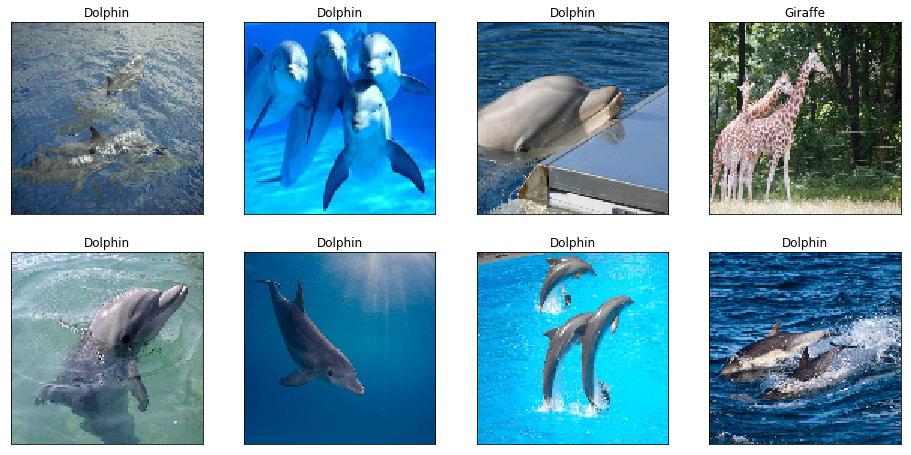

In [13]:
resized_images = my_images.resize(width=128, height=128, inplace=False)
resized_images.show(8,4)

In [14]:
resized_images.image_summary

jpg                   409
minWidth              128
maxWidth              128
minHeight             128
maxHeight             128
meanWidth             128
meanHeight            128
mean1stChannel    128.655
min1stChannel           0
max1stChannel         255
mean2ndChannel     124.08
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    94.3479
min3rdChannel           0
max3rdChannel         255
dtype: object

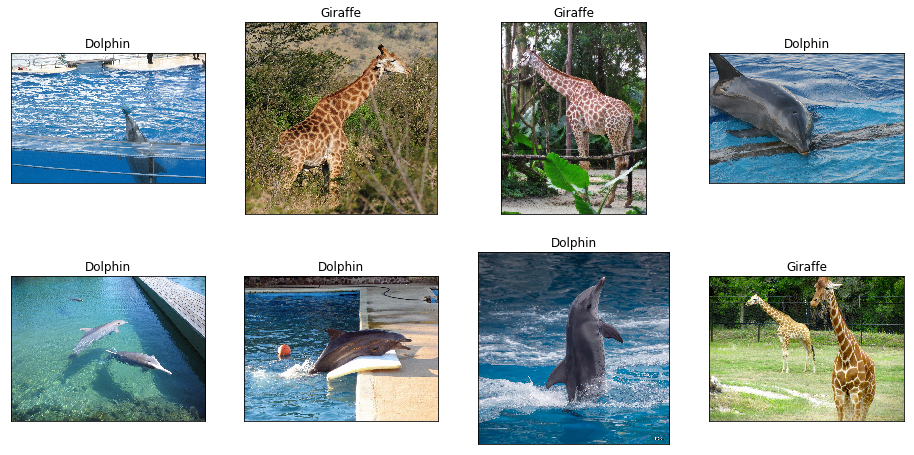

In [15]:
my_images.show(8,4)

In [16]:
my_images.image_summary

jpg                   409
minWidth              170
maxWidth             1024
minHeight             127
maxHeight            1024
meanWidth         912.147
meanHeight        778.499
mean1stChannel    128.718
min1stChannel           0
max1stChannel         255
mean2ndChannel    124.123
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    94.2449
min3rdChannel           0
max3rdChannel         255
dtype: object

**Note:** the processed images are in the resized_images table, and the original table is not modified.

#### Modify images inplace (inplace=True)

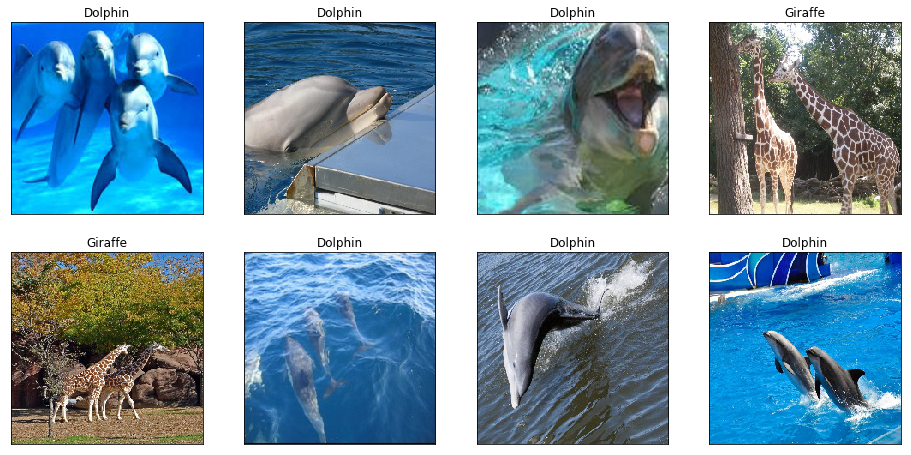

In [17]:
my_images.resize(width=224, height=224, inplace=True)
my_images.show(8,4)

In [18]:
my_images.image_summary

jpg                   409
minWidth              224
maxWidth              224
minHeight             224
maxHeight             224
meanWidth             224
meanHeight            224
mean1stChannel    128.589
min1stChannel           0
max1stChannel         255
mean2ndChannel    124.005
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    94.2498
min3rdChannel           0
max3rdChannel         255
dtype: object

**Note:** the original table has been modified.

### Crop images

#### Create crops from the original images.

In [19]:
cropped_images = my_images.crop(x=50, y=50, width=100, height=100, inplace=False)

*x, y* specify the coordinate of the top-left corner of the cropped images.

width, height specify the size of the cropped images.

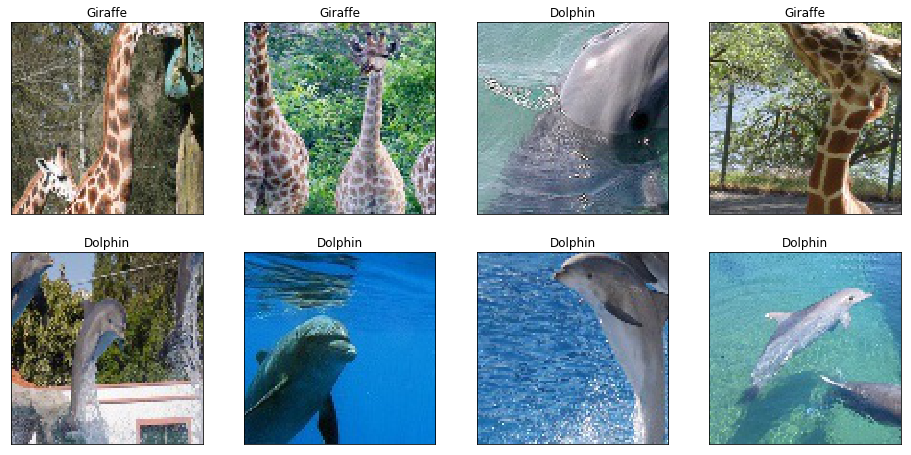

In [20]:
cropped_images.show(8,4)

In [21]:
cropped_images.image_summary

jpg                   409
minWidth              100
maxWidth              100
minHeight             100
maxHeight             100
meanWidth             100
meanHeight            100
mean1stChannel    121.999
min1stChannel           0
max1stChannel         255
mean2ndChannel    119.171
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    98.0679
min3rdChannel           0
max3rdChannel         255
dtype: object

### Augment image data

#### Extract multiple crops from each of the original images.

In [22]:
aug_images = my_images.as_patches(x=0, y=0, width=112, height=112, step_size=56,
                                  output_width=112, output_height=112, inplace=False)

x, y specify the coordinate of the top-left corner of the first crop.

width, height specify the size of the crop windows.

step_size specify the step size of the moving windows for extracting the crops.

output_width, output_height specify the size of the output images.

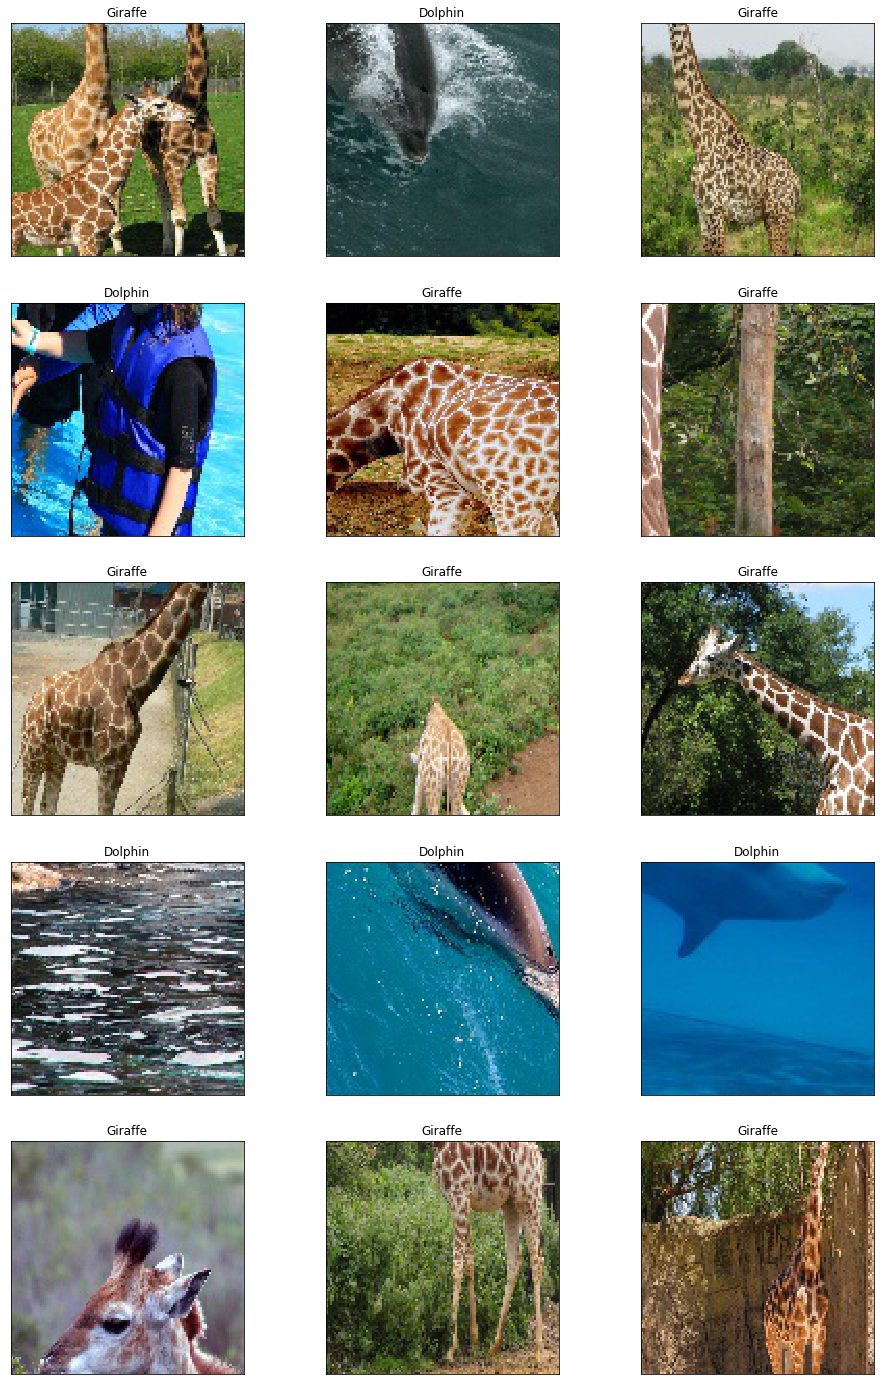

In [23]:
aug_images.show(15,3, randomize=False)

In [24]:
my_images.label_freq

Frequency for IMAGEDATA_Y7G5BN

         Level  Frequency
Dolphin      1        237
Giraffe      2        172

In [25]:
aug_images.label_freq

Frequency for IMAGEDATA_ZUYG9K

         Level  Frequency
Dolphin      1       2133
Giraffe      2       1548

In [26]:
aug_images.image_summary

jpg                  3681
minWidth              112
maxWidth              112
minHeight             112
maxHeight             112
meanWidth             112
meanHeight            112
mean1stChannel    126.932
min1stChannel           0
max1stChannel         255
mean2ndChannel    122.868
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    95.2871
min3rdChannel           0
max3rdChannel         255
dtype: object

**Note:** the function enrichs the data set in the table by create multiple crops from each of the images in the table.

### Random Augmentation

#### Extract multiple crops from each of the original images, and randomly write into the table.

In [27]:
raug_images = my_images.as_random_patches(random_ratio=0.5, x=0, y=0, width=112, height=112, step_size=56,
                                         output_width=112, output_height=112, inplace=False)

random_ratio (between 0 and 1) specifies the proportion of the generated crops to write into the output table.

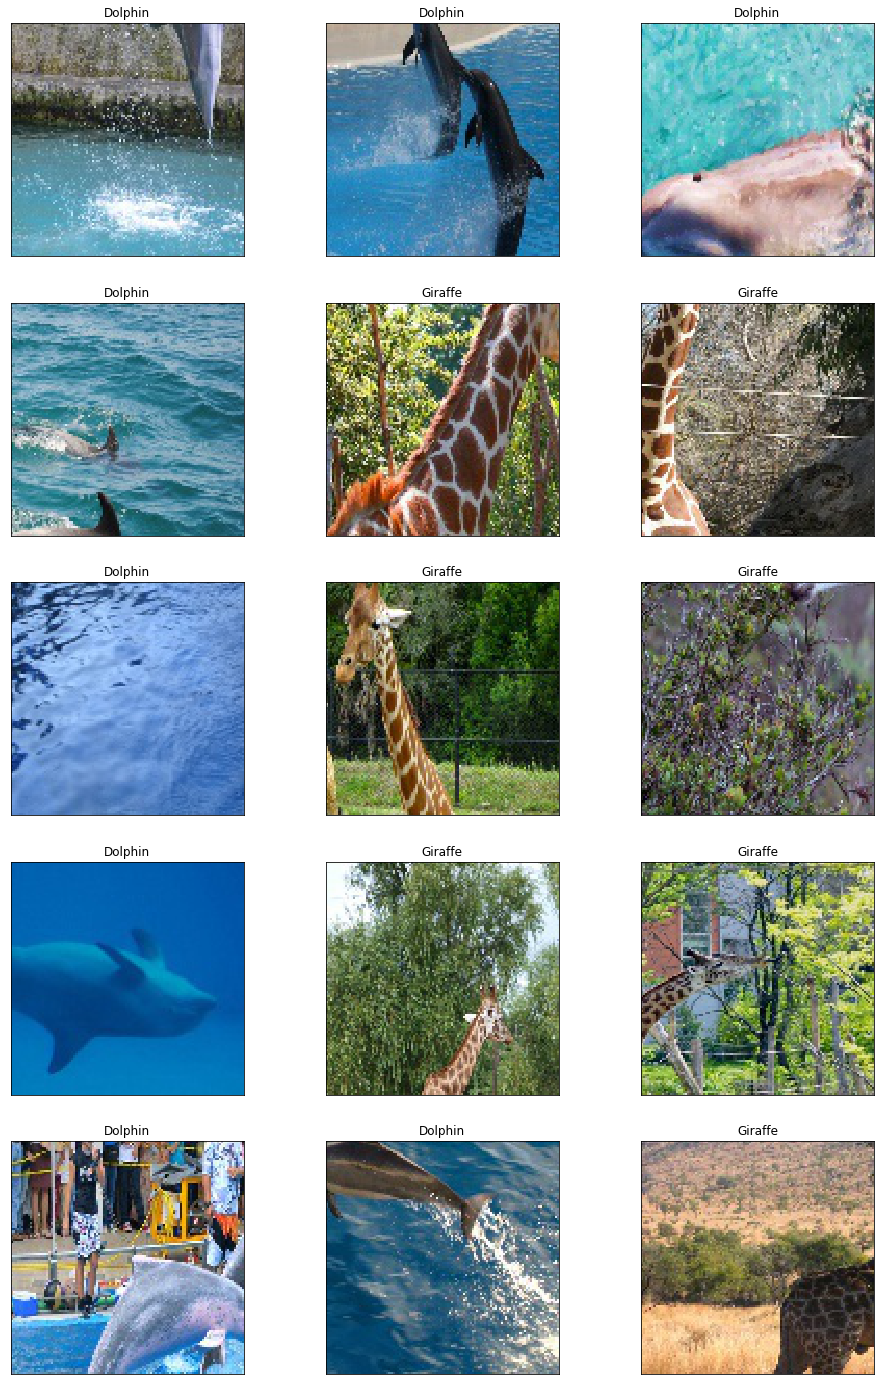

In [28]:
raug_images.show(15,3, randomize=False)

In [29]:
my_images.label_freq

Frequency for IMAGEDATA_Y7G5BN

         Level  Frequency
Dolphin      1        237
Giraffe      2        172

In [30]:
raug_images.label_freq

Frequency for IMAGEDATA_WUZWM3

         Level  Frequency
Dolphin      1       1097
Giraffe      2        771

In [31]:
raug_images.image_summary

jpg                  1868
minWidth              112
maxWidth              112
minHeight             112
maxHeight             112
meanWidth             112
meanHeight            112
mean1stChannel    127.607
min1stChannel           0
max1stChannel         255
mean2ndChannel    122.823
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    94.4908
min3rdChannel           0
max3rdChannel         255
dtype: object

Note that the only difference between as_patches  and as_random_patches is that the former one keep all the crops while the later one keep part of them.

### Save ImageTable to image files

Save the images in the table to a specified path on the server. For security purpose, if you want to save images locally, please save them on server side and use ftp or scp to copy or move them to your local directory.

In [32]:
my_images.to_files(path = '/dept/cas/leliuz/Data/Demo/New_folder')

**Note:** path must be an existing directory on the server. The format must meet the server OS requirements.

### Save ImageTable to other file format

#### Please refer to SWAT reference page for CASTable: Serialization / IO / Conversion section

https://developer.sas.com/apis/swat/python/v1.1.0/api.html#serialization-io-conversion

In [33]:
sess.endsession()

+ Elapsed: 0.00613s, user: 0.00584s, sys: 0.00973s, mem: 1.61mb